In [2]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Resources/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Card Type'].unique()


array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [8]:
encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND'])

In [9]:
categorical_columns = ['Geography', 'Gender']
ordinal_columns = ['Card Type']


In [10]:
encoded_columns = encoder.fit_transform(df[categorical_columns])
#Create a DataFrame with the encoded columns

one_hot_df = pd.DataFrame(encoded_columns, 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
df_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,1,1,2,DIAMOND,464,1.0,0.0,0.0,1.0,0.0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,1,3,DIAMOND,456,0.0,0.0,1.0,1.0,0.0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,1,1,3,DIAMOND,377,1.0,0.0,0.0,1.0,0.0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,0,5,GOLD,350,1.0,0.0,0.0,1.0,0.0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,0,5,GOLD,425,0.0,0.0,1.0,1.0,0.0


In [11]:
ordinal_encoder = OrdinalEncoder(categories=[['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']])
ordinal_column = ordinal_encoder.fit_transform(df[['Card Type']])
ordinal_df = pd.DataFrame(ordinal_column, 
                          columns=ordinal_encoder.get_feature_names_out(['Card Type']))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_encoded.drop(['Card Type'], axis=1), ordinal_df], axis=1)
df_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,1,1,2,464,1.0,0.0,0.0,1.0,0.0,3.0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,1,3,456,0.0,0.0,1.0,1.0,0.0,3.0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,1,1,3,377,1.0,0.0,0.0,1.0,0.0,3.0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,0,5,350,1.0,0.0,0.0,1.0,0.0,1.0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,0,5,425,0.0,0.0,1.0,1.0,0.0,1.0


In [12]:
correlation = df_encoded.drop(columns='Surname').corr()['Exited']
display(correlation.sort_values(ascending=False))

Exited                1.000000
Complain              0.995693
Age                   0.285296
Geography_Germany     0.173313
Balance               0.118577
Gender_Female         0.106267
Card Type             0.016949
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
Geography_Spain      -0.052800
Geography_France     -0.104688
Gender_Male          -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64

In [13]:
X = df_encoded.drop(columns=[ 'RowNumber', 'CustomerId', 'Surname', 'Exited', 'Complain'])

In [14]:
y = df['Exited']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(X_train)
scaler_test.fit(X_test)
X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

In [17]:
# Decision Tree Model
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.79
Balanced Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [18]:
# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='balanced_accuracy', 
                           cv=5, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:")
print(best_params)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print("Classification Report:")
print(report)


Best Parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.84
Balanced Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1607
           1       0.64      0.48      0.55       393

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.84      2000



Best Parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.84
Balanced Accuracy: 0.71
AUC: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1607
           1       0.64      0.48      0.55       393

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.84      2000



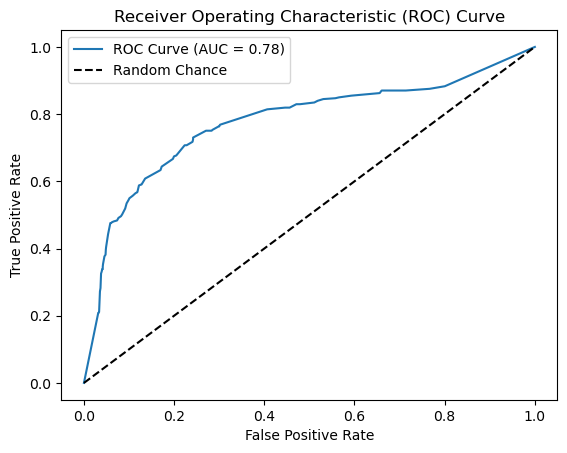

In [19]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print("Best Parameters:")
print(best_params)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print(f"AUC: {auc:.2f}")
print("Classification Report:")
print(report)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()